## Festival Recursivo

Luego de entrar por la puerta te sorprendende encontrar un bullicioso lugar lleno de tarimas y personas caminando de un lado a otro, un torrente de colores y sonidos te sobrecoge haciendote dudar cual de los tantos lugares visitaras primero. Puedes notar que en cada instalacion hay una persona proponiendo un puzzle y al que logre resolverlo lo premian con un puñado de recursicoins, la moneda local, te das cuenta que tienes 3 de estas monedas en tus manos. De un primer vistazo puedes apreciar las siguientes atracciones, a cual te gustaria ir:

pd: cada recursicoin vale 0.5 puntos en la nota del intra ;)

### Torres de Hanoi. 
1 recursicoin

Este juego en su forma más básica está formado por tres varillas verticales, en una de ellas, la cual denominaremos origen, se apila una torre de n discos ordenados de mayor a menor tamaño, siendo el disco de mayor tamaño la base. El objetivo de este juego consiste en mover la torre de la varilla origen a la varilla destino con el menor número de movimientos posible. Para realizarlo habrá que seguir dos simples normas: Sólo se moverá un disco por vez. No se podrá colocar un disco de mayor tamaño sobre otro de menor tamaño.

Escribe una funcion que reciba, la cantidad de discos, y las 3 varillas que pueden ser representadas como una lista (o pila) de numeros, e imprima cada uno de los pasos que se ejecutaron para resolver el juego.

In [9]:
def solve_hanoi(n, origen, destino, auxiliar):
    if n == 1:
        if (len(origen)>0):
            print(f"Desde {origen} hacia {destino}")
            disk = origen.pop()
            destino.append(disk)
            return
    solve_hanoi(n-1,origen,auxiliar,destino)
    print(f"Desde {origen} hacia {destino}")
    if (len(origen)>0):
       disk = origen.pop()
       destino.append(disk)
       return solve_hanoi(n-1,auxiliar,destino,origen)
    if len(origen) == 0 and len(auxiliar) == 0:
        return "Victoria" 
    pass
#Ejemplo:
n = 4
origen = [4,3,2,1]
destino = []
auxiliar = []
if solve_hanoi(n,origen,destino,auxiliar):
    print(solve_hanoi(n,origen,destino,auxiliar))


Desde [4, 3, 2, 1] hacia []
Desde [4, 3, 2] hacia []
Desde [1] hacia [2]
Desde [4, 3] hacia []
Desde [2, 1] hacia [4]
Desde [2] hacia [3]
Desde [4, 1] hacia [3, 2]
Desde [4] hacia []
Desde [3, 2, 1] hacia [4]
Desde [3, 2] hacia []
Desde [4, 1] hacia [2]
Desde [3] hacia [4]
Desde [2, 1] hacia []
Desde [2] hacia [4, 3]
Desde [1] hacia [4, 3, 2]


### Descomponer en sumandos
2 recursicoin

Implemente un método que imprima en la Consola la descomposición en sumandos de un número n.

Ejemplo: n = 5
```
1 + 1 + 1 + 1 + 1
1 + 1 + 1 + 2
1 + 2 + 2
1 + 1 + 3
1 + 4
2 + 3
5
```

In [4]:
def descomponer(n):
    def portal(start, target, sum_actual, list_actual):
        if sum_actual == target:
            ecuacion = ""
            for i,num in enumerate(list_actual):
                if i>0:
                    ecuacion+=' + '
                ecuacion+=str(num)
            print(ecuacion)
            return
        for i in range(start,target-sum_actual+1):
            list_actual.append(i)
            portal(i,target,sum_actual+i,list_actual)
            list_actual.pop()
    portal(1,n,0,[])
    pass
#Ejemplo:
n = 5
descomponer(n)

1 + 1 + 1 + 1 + 1
1 + 1 + 1 + 2
1 + 1 + 3
1 + 2 + 2
1 + 4
2 + 3
5


### Suma subconjunto

3 recursicoin

Implemente una función que dado una lista de números enteros y un entero k diga si existe un subconjunto de la lista de números que sume k.

In [5]:
def sub_set_sum(numbers, k):
    if len(numbers) == 0:
        return False
    if len(numbers)==1:
        if numbers[0] == k:
            return numbers[0]
    if sum(numbers) == k:
        for i in numbers[:-1]:
            print(i,end="+")
        print(f"{numbers[-1]} = {k}")
        return True
    pivot = numbers[0]
    for i in numbers[1:]:
        if pivot + i == k:
            print(f"{pivot}+{i} = {k}")
            return True
    temp = numbers
    numbers = numbers[1:]
    if (sum([pivot]+[numbers[0]])<k):
        new_pivot = [pivot]+[numbers[0]]
        new_numbers = numbers[1:]
        for i in new_numbers:
            suma = sum([pivot]+[numbers[0]])
            suma += i
            if suma == k:
                print(f"{new_pivot[0]}+{new_pivot[1]}+{i}={k}")
                return True
            elif suma > k:
                break

    for i in numbers:
        suma = [pivot]
        suma += [i]
        if sum(suma) == k:
            for j in suma:
                print(j,end="")
            return True
        elif sum(suma) > k:
            break
    numbers = temp
    numbers = numbers[1:]+[pivot]
    return sub_set_sum(numbers,k)
#Ejemplo:

print(sub_set_sum([90,40,1,1,5,1,0], 97))
        
    

RecursionError: maximum recursion depth exceeded

### Sudoku doble

7 recursicoin

implemente una funcion que reciba 2 matrices que reprensentan un sudoku cada una, ambos sudokus estan relacionados de la forma que se muestra en la imagen, su funcion debe resolver y retornar ambos sudokus

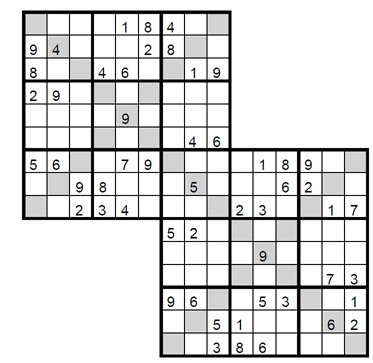

```
sudoku1 = [
    [0, 0, 0, 0, 1, 8, 4, 0, 0],
    [9, 4, 0, 0, 0, 2, 8, 0, 0],
    [8, 0, 0, 4, 6, 0, 0, 1, 9],
    [2, 9, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 6],
    [5, 6, 0, 0, 7, 9, 0, 0, 0],
    [0, 0, 9, 8, 0, 0, 0, 5, 0],
    [0, 0, 2, 3, 4, 0, 0, 0, 0],
]


sudoku2 = [
    [0, 0, 0, 0, 1, 8, 9, 0, 0],
    [0, 5, 0, 0, 0, 6, 2, 0, 0],
    [0, 0, 0, 2, 3, 0, 0, 1, 7],
    [5, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 7, 3],
    [9, 6, 0, 0, 5, 3, 0, 0, 1],
    [0, 0, 5, 1, 0, 0, 0, 6, 2],
    [0, 0, 3, 8, 6, 0, 0, 0, 0]
]
```

def solve_double_sudoku(sudoku1, sudoku2):
    pass

este se lo debo :/